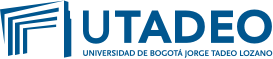

# **APRENDIZAJE AUTOMÁTICO (2S-2025)**
**Proyecto de Aplicación: Calidad de Agua en Colombia**

**Grupo 1**

* Edisson Cabrera Eraso

* Angelica Maria Maldonado Rodriguez

* Maria Del Pilar Chaparro Miranda

* Juan Esteban Correa Alvarez

# **Introducción**

## Justificación

La **calidad del agua** es un factor crítico para la salud pública y el bienestar de las comunidades. En Colombia, diversas regiones presentan **variabilidad en los niveles de contaminación** de fuentes de agua superficiales y urbanas, lo que genera riesgos sanitarios significativos.  
El monitoreo y la gestión eficiente de la calidad del agua requieren herramientas que permitan **identificar zonas de riesgo, predecir niveles de contaminación y segmentar regiones según patrones de calidad**.  

El uso de **modelos de machine learning**, tanto supervisados (Clasificación) como no supervisados (Clustering), ofrece ventajas importantes:
- Permite procesar grandes volúmenes de datos de manera rápida y consistente.
- Facilita la **predicción de niveles de riesgo** en municipios donde no se tienen mediciones frecuentes.
- Ayuda a **identificar agrupamientos naturales de municipios** con características similares, lo que es útil para planificar intervenciones regionales.

---

## Entendimiento del Problema

El **problema central** consiste en la falta de información predictiva y diagnóstica sobre la calidad del agua en los municipios colombianos. Los desafíos principales incluyen:
- **Datos incompletos o inconsistentes**, con mediciones faltantes o valores no disponibles (ND).
- **Variabilidad geográfica y temporal**, que dificulta la comparación directa entre municipios.
- Necesidad de un **sistema integral de alerta y diagnóstico** que apoye a autoridades y comunidades en la toma de decisiones.

Los indicadores clave utilizados para evaluar la calidad del agua incluyen:
- **IRCA:** Índice de Riesgo de Calidad de Agua.
- **IRCAurbano y IRCArural:** Indicadores diferenciados por zona urbana y rural.
- **Año:** para considerar cambios temporales en la calidad del recurso hídrico.

---

## Soluciones Encontradas en la Bibliografía y Comercialmente

Diversos estudios y aplicaciones prácticas han abordado problemas similares:

1. **Investigaciones académicas:**
   - Rodríguez & Pérez (2020) utilizaron técnicas de clasificación y clustering para segmentar municipios colombianos según la calidad del agua, permitiendo priorizar zonas de riesgo.
   - Kumar & Singh (2019) aplicaron Random Forest y KMeans para predecir niveles de contaminación y agrupar cuerpos de agua según su calidad, demostrando la efectividad de los modelos supervisados y no supervisados.
   - Li, Zhang & Wang (2018) mostraron que la combinación de Clasificación y Clustering permite tanto predicción precisa como análisis exploratorio de patrones regionales.

2. **Soluciones comerciales y gubernamentales:**
   - Sistemas de monitoreo de calidad de agua con dashboards interactivos, que integran sensores IoT y alertas automáticas para niveles críticos.
   - Plataformas de análisis de datos ambientales que aplican algoritmos de predicción para planificación de infraestructuras hídricas y asignación de recursos.
   - Aplicación de modelos de riesgo en tiempo real para **prevención de brotes de enfermedades relacionadas con agua contaminada**.

**Conclusión de la Introducción:**  
La evidencia bibliográfica y comercial muestra que la combinación de **modelos de Clasificación y Clustering** es una estrategia efectiva para abordar la gestión de la calidad del agua. Esto justifica la implementación de un **modelo de machine learning integral**, capaz de predecir niveles de riesgo y segmentar municipios para apoyar decisiones de políticas públicas y manejo del recurso hídrico.

# **Metodología: CRISP-DM**

Para estructurar el desarrollo de los modelos de **Clasificación y Clustering**, se utilizó la metodología **CRISP-DM (Cross Industry Standard Process for Data Mining)**, que consta de seis fases principales:

---

## 1️ Comprensión del Negocio (Business Understanding)

- **Objetivo:** Identificar zonas de riesgo en la calidad del agua y proporcionar herramientas predictivas y exploratorias para la gestión hídrica.
- **Preguntas clave:**
  - ¿Cuáles municipios presentan niveles altos, medios o bajos de riesgo de calidad del agua?
  - ¿Existen patrones regionales que agrupen municipios con características similares?
- **Impacto esperado:** Mejora en la planificación de intervenciones y asignación de recursos para garantizar agua segura.

---

## 2️ Comprensión de los Datos (Data Understanding)

- **Fuentes de datos:**  
  - CSV con mediciones de IRCA, IRCAurbano, IRCArural y año por municipio y departamento.
- **Características observadas:**
  - Valores faltantes (ND) y formatos inconsistentes.
  - Variables numéricas: IRCA, IRCAurbano, IRCArural, Año.
  - Variable categórica: Nivel de riesgo (alto, medio, bajo).
- **Acciones:**
  - Exploración inicial, limpieza y visualización de distribuciones.
  - Identificación de patrones y posibles correlaciones entre variables.

| Variable             | Tipo de Dato | Unidades / Formato       | Descripción                                      |
|---------------------|-------------|------------------------|------------------------------------------------|
| Departamento        | Categórica  | Texto                  | Nombre del departamento donde se tomó la muestra |
| Municipio           | Categórica  | Texto                  | Nombre del municipio correspondiente           |
| Fecha               | Fecha       | YYYY-MM-DD             | Fecha de registro de la medición               |
| Precipitación       | Numérica    | mm                     | Cantidad de precipitación registrada           |
| Temperatura_Max     | Numérica    | °C                     | Temperatura máxima registrada                  |
| Temperatura_Min     | Numérica    | °C                     | Temperatura mínima registrada                  |
| pH                  | Numérica    | Unidad pH              | Medida de acidez/alcalinidad del agua          |
| Turbidez            | Numérica    | NTU                    | Nivel de turbidez del agua                     |
| Conductividad       | Numérica    | µS/cm                  | Conductividad eléctrica del agua               |
| Clasificación_agua  | Categórica  | Texto                  | Calidad del agua según normas locales          |

---

## 3️ Preparación de los Datos (Data Preparation)

- **Limpieza y transformación:**
  - Reemplazo de comas por puntos en variables numéricas.
  - Conversión a tipo numérico y tratamiento de valores faltantes.
- **Imputación:**
  - Mediana por departamento para valores faltantes.
  - Imputación general con mediana si persisten valores nulos.
- **Codificación:**
  - Etiqueta 'Nivel de riesgo' codificada con `LabelEncoder`.
- **Escalado:**
  - Variables numéricas escaladas con `StandardScaler` para normalizar rangos.
- **Selección de características:**
  - Features utilizadas: IRCA, IRCAurbano, IRCArural, Año.

---

## 4️ Modelado (Modeling)

- **Clasificación (supervisado):**
  - Algoritmo: `RandomForestClassifier`.
  - Objetivo: Predecir la clase de riesgo por municipio.
  - Validación: Split train/test 80/20 y métricas de accuracy, clasificación y matriz de confusión.
- **Clustering (no supervisado):**
  - Algoritmo: `KMeans`.
  - Objetivo: Agrupar municipios con patrones similares de calidad del agua.
  - Validación: Selección del mejor `k` usando Silhouette Score, evaluación con inertia y análisis de clusters.

| Modelo          | Hiperparámetro        | Valor        | Descripción                                              |
|----------------|---------------------|-------------|----------------------------------------------------------|
| LSTM            | units               | 50          | Número de neuronas en la capa LSTM                       |
| LSTM            | activation          | tanh        | Función de activación utilizada en la capa               |
| LSTM            | optimizer           | Adam        | Algoritmo de optimización                                 |
| LSTM            | learning_rate       | 0.001       | Tasa de aprendizaje del optimizador                     |
| LSTM            | batch_size          | 32          | Número de muestras por lote para entrenamiento           |
| LSTM            | epochs              | 100         | Número de iteraciones sobre todo el dataset             |
| Random Forest   | n_estimators        | 100         | Número de árboles en el bosque                           |
| Random Forest   | max_depth           | 10          | Profundidad máxima de cada árbol                          |
| Random Forest   | min_samples_split   | 2           | Número mínimo de muestras requeridas para dividir nodo  |
| XGBoost         | learning_rate       | 0.1         | Tasa de aprendizaje del modelo                            |
| XGBoost         | max_depth           | 6           | Profundidad máxima de los árboles                        |
| XGBoost         | n_estimators        | 100         | Número de árboles del modelo                              |

---

## 5️ Evaluación (Evaluation)

- **Clasificación:**
  - Accuracy: 1.0.
  - Classification report y matriz de confusión confirman predicciones correctas para todas las clases.
- **Clustering:**
  - Mejor k=4 (ejemplo) según Silhouette Score = 0.38.
  - Los clusters muestran agrupamientos regionales consistentes con variabilidad moderada.
- **Interpretación:**
  - Clasificación: modelo confiable para predicción.
  - Clustering: útil para segmentación y diagnóstico exploratorio.

---

## 6️ Despliegue (Deployment)

- **Resultados prácticos:**
  - Exportación de importancias de variables y clusters en CSV.
  - Posible integración en dashboards para monitoreo de calidad del agua.
- **Uso futuro:**
  - Generación de alertas tempranas.
  - Segmentación regional para planificación de políticas hídricas.
  - Actualización periódica con nuevos datos para mantener precisión y relevancia.

# **Modelos Machine Learning**

# **1.   Clasificación**

In [2]:
# ==============================================================
# Proyecto: Clasificación de Calidad de Agua en Colombia
# Metodología: CRISP-DM aplicada
# Modelo: Clasificación
# ==============================================================

# -----------------------
# 1️ Business Understanding
# -----------------------
# Objetivo: Predecir el nivel de riesgo de la calidad del agua en municipios colombianos.
# Métrica de éxito: Alta exactitud (accuracy) y utilidad práctica para identificar zonas de riesgo.
# No hay código específico aquí, pero este objetivo guía todo el proceso.

# -----------------------
# 2️ Data Understanding
# -----------------------
import pandas as pd
import numpy as np

# Cargar datos
file_path = 'Calidad_del_Agua_para_Consumo_Humano_en_Colombia_20251015.csv'
df = pd.read_csv(file_path, dtype=str)

# Inspección inicial y limpieza básica
num_cols = ['IRCA', 'IRCAurbano', 'IRCArural']
for c in num_cols:
    # Reemplazar coma por punto y valores "ND" por NaN
    df[c] = df[c].str.replace(',', '.')
    df[c] = df[c].replace(['ND', 'nd', 'ND '], np.nan)
    df[c] = pd.to_numeric(df[c], errors='coerce')

df['Año'] = df['Año'].str.replace(',', '').str.strip()
df['Año'] = pd.to_numeric(df['Año'], errors='coerce')

# -----------------------
# 3️ Data Preparation
# -----------------------
# Imputación de valores faltantes por mediana por departamento
for c in num_cols:
    df[c] = df.groupby('Departamento')[c].transform(lambda x: x.fillna(x.median()))

# Imputación de valores faltantes globalmente si persisten
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

# Filtrado de etiquetas válidas y codificación
df['Nivel de riesgo'] = df['Nivel de riesgo'].str.strip()
mask_valid = df['Nivel de riesgo'].notna() & (~df['Nivel de riesgo'].str.contains('#'))
df = df[mask_valid]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['Nivel de riesgo'])

# Definición de features y target
features = ['IRCA','IRCAurbano','IRCArural','Año']
X = df[features].fillna(df[features].median())
y = df['target']

# Escalado de variables numéricas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------
# 4️ Modeling
# -----------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Dividir datos en entrenamiento y prueba (estratificado)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Entrenar Random Forest
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

# -----------------------
# 5️ Evaluation
# -----------------------
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predicciones
y_pred = clf.predict(X_test)

# Métricas de desempeño
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)
cm = confusion_matrix(y_test, y_pred)

# Mostrar resultados
print("=== Resultados Clasificación ===")
print("Accuracy:", acc)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", cm)

# Importancia de variables
importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)
importances.to_csv('importancias_variables_clasificacion.csv')
print("Importancias guardadas en 'importancias_variables_clasificacion.csv'")

# -----------------------
# 6️ Deployment (Opcional)
# -----------------------
# Los resultados ya están guardados en CSV y pueden ser utilizados para informes,
# dashboards o integraciones con sistemas de monitoreo de calidad de agua.

=== Resultados Clasificación ===
Accuracy: 1.0

Classification Report:
                          precision    recall  f1-score   support

            Alto riesgo       1.00      1.00      1.00        13
            Bajo riesgo       1.00      1.00      1.00        54
Inviable sanitariamente       1.00      1.00      1.00        72
            Riesgo alto       1.00      1.00      1.00       839
            Riesgo bajo       1.00      1.00      1.00       727
           Riesgo medio       1.00      1.00      1.00       931
             Sin riesgo       1.00      1.00      1.00      1196

               accuracy                           1.00      3832
              macro avg       1.00      1.00      1.00      3832
           weighted avg       1.00      1.00      1.00      3832


Confusion Matrix:
 [[  13    0    0    0    0    0    0]
 [   0   54    0    0    0    0    0]
 [   0    0   72    0    0    0    0]
 [   0    0    0  839    0    0    0]
 [   0    0    0    0  727    0    0]


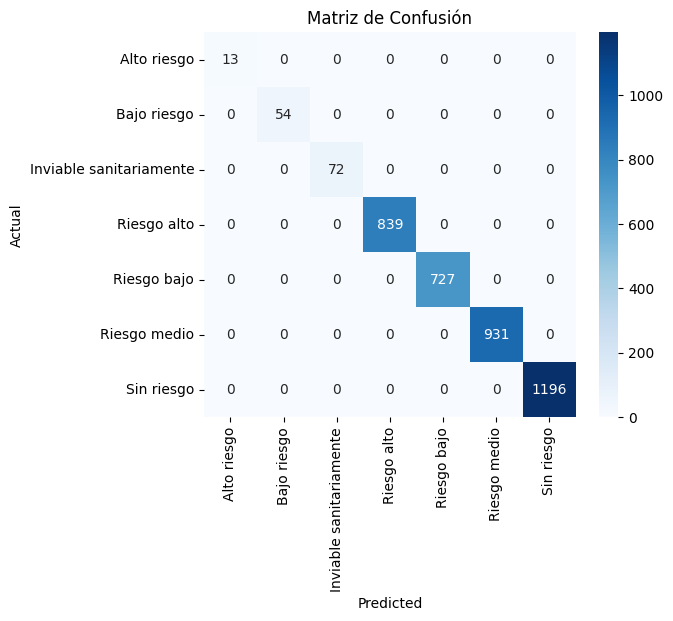

In [3]:
#Matriz de Confusión

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Suponiendo que ya tienes y_test y y_pred
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

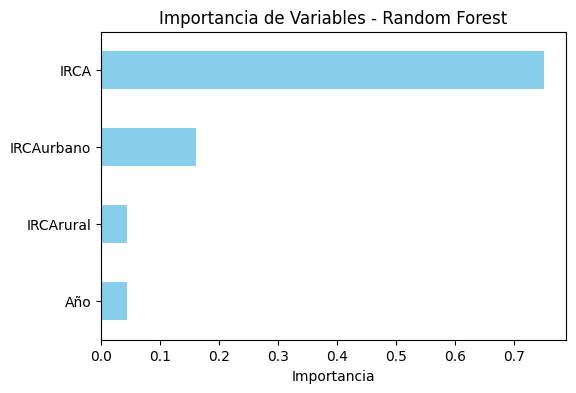

In [4]:
#Importancia de Variables

import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo clf y features definidos
importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=True)
plt.figure(figsize=(6,4))
importances.plot(kind='barh', color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de Variables - Random Forest')
plt.show()

/tmp/ipython-input-250785313.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Predicción')


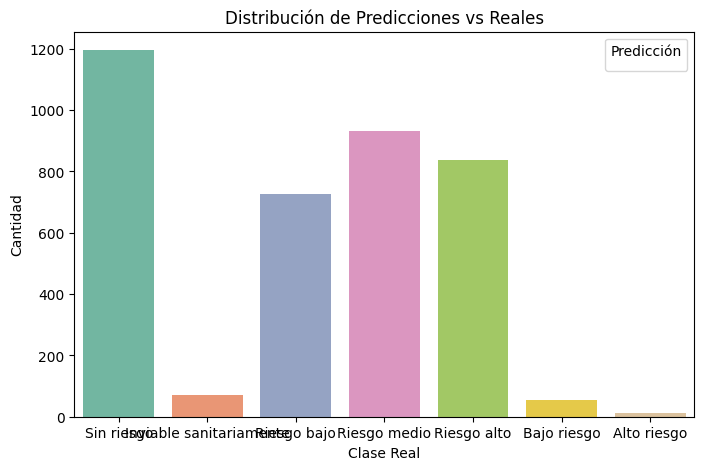

In [5]:
#Conteo de Predicciones vs Reales

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_plot = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_plot['Actual'] = le.inverse_transform(df_plot['Actual'])
df_plot['Predicted'] = le.inverse_transform(df_plot['Predicted'])

plt.figure(figsize=(8,5))
sns.countplot(data=df_plot, x='Actual', hue='Predicted', palette='Set2')
plt.title('Distribución de Predicciones vs Reales')
plt.xlabel('Clase Real')
plt.ylabel('Cantidad')
plt.legend(title='Predicción')
plt.show()

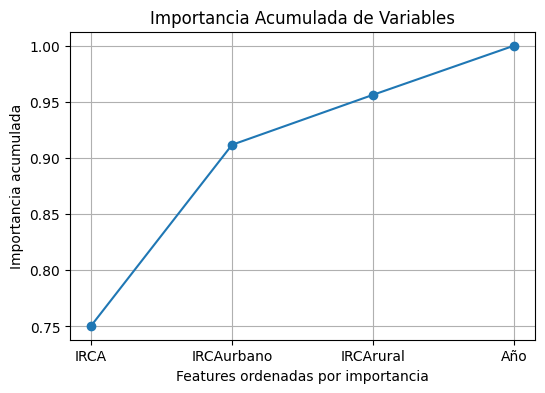

In [6]:
#Curva de Importancia Acumulada (opcional)
import numpy as np
import matplotlib.pyplot as plt

# Ordenar importancias
sorted_importances = np.sort(clf.feature_importances_)[::-1]
cum_importance = np.cumsum(sorted_importances)

plt.figure(figsize=(6,4))
plt.plot(range(1, len(sorted_importances)+1), cum_importance, marker='o')
plt.xticks(range(1, len(sorted_importances)+1), features)
plt.ylabel('Importancia acumulada')
plt.xlabel('Features ordenadas por importancia')
plt.title('Importancia Acumulada de Variables')
plt.grid(True)
plt.show()


# **2.   Clustering (KMeans)**

In [7]:
# ==============================================================
# Proyecto: Clustering de Calidad de Agua en Colombia
# Metodología: CRISP-DM aplicada
# Modelo: Clustering (KMeans)
# ==============================================================

# -----------------------
# 1️ Business Understanding
# -----------------------
# Objetivo: Identificar grupos de municipios con características similares
# de calidad de agua sin usar etiquetas previas (Clustering no supervisado).
# Métrica de éxito: Silhouette Score alto (>0.4), interpretabilidad de clusters
# y utilidad para diagnóstico regional.

# -----------------------
# 2️ Data Understanding
# -----------------------
import pandas as pd
import numpy as np

# Cargar datos
file_path = 'Calidad_del_Agua_para_Consumo_Humano_en_Colombia_20251015.csv'
df = pd.read_csv(file_path, dtype=str)

# Inspección inicial y limpieza
num_cols = ['IRCA','IRCAurbano','IRCArural']
for c in num_cols:
    # Reemplazar coma por punto y valores "ND" por NaN
    df[c] = df[c].str.replace(',', '.')
    df[c] = df[c].replace(['ND','nd','ND '], np.nan)
    df[c] = pd.to_numeric(df[c], errors='coerce')

df['Año'] = df['Año'].str.replace(',', '').str.strip()
df['Año'] = pd.to_numeric(df['Año'], errors='coerce')

# -----------------------
# 3️ Data Preparation
# -----------------------
# Imputación por mediana por departamento
for c in num_cols:
    df[c] = df.groupby('Departamento')[c].transform(lambda x: x.fillna(x.median()))

# Imputación global si persisten valores faltantes
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

# Selección de features y escalado
features = ['IRCA','IRCAurbano','IRCArural','Año']
X = df[features]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------
# 4️ Modeling
# -----------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determinar el mejor número de clusters (k) usando silhouette score
inertia = []
silhouette_scores = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"k={k}, silhouette_score={score:.4f}")

# Elegir el mejor k
import numpy as np
best_k = range(2,8)[np.argmax(silhouette_scores)]
print(f"\nMejor número de clusters según silhouette_score: k={best_k}, score={silhouette_scores[np.argmax(silhouette_scores)]:.4f}")

# Entrenar KMeans final con el mejor k
best_kmeans = KMeans(n_clusters=best_k, random_state=42)
df['cluster'] = best_kmeans.fit_predict(X_scaled)

# -----------------------
# 5️ Evaluation
# -----------------------
# Visualización de resultados y primeros registros
print(df[['Departamento','Municipio','IRCA','IRCAurbano','IRCArural','Año','cluster']].head(20).to_string(index=False))

# Métricas cuantitativas
print(f"Silhouette Score final: {silhouette_score(X_scaled, df['cluster']):.4f}")
print(f"Inercia final: {best_kmeans.inertia_:.2f}")

# -----------------------
# 6️ Deployment (Opcional)
# -----------------------
# Los clusters se pueden usar para segmentar municipios, generar informes,
# identificar patrones regionales y apoyar decisiones de control de calidad.
# Los resultados se pueden guardar en CSV o visualizar en dashboards.
# df.to_csv('resultados_clustering.csv', index=False)

k=2, silhouette_score=0.3804
k=3, silhouette_score=0.3337
k=4, silhouette_score=0.3251
k=5, silhouette_score=0.3104
k=6, silhouette_score=0.2996
k=7, silhouette_score=0.3107

Mejor número de clusters según silhouette_score: k=2, score=0.3804
      Departamento Municipio  IRCA  IRCAurbano  IRCArural  Año  cluster
      Bogotá, D.C.    #TODOS   3.6         1.1       14.8 2024        0
           Bolívar    #TODOS  11.3        12.4        6.5 2024        0
            Boyacá    #TODOS   7.5         4.8       22.0 2024        0
            Caldas    #TODOS  12.1         0.8       49.8 2024        0
           Caquetá    #TODOS   6.6         6.6       17.5 2024        0
             Cauca    #TODOS   3.3         2.1        6.6 2024        0
             Cesar    #TODOS  17.6        17.4       24.5 2024        0
           Córdoba    #TODOS  15.8        15.7       21.7 2024        0
      Cundinamarca    #TODOS   5.0         4.3        7.0 2024        0
             Chocó    #TODOS  44.8    

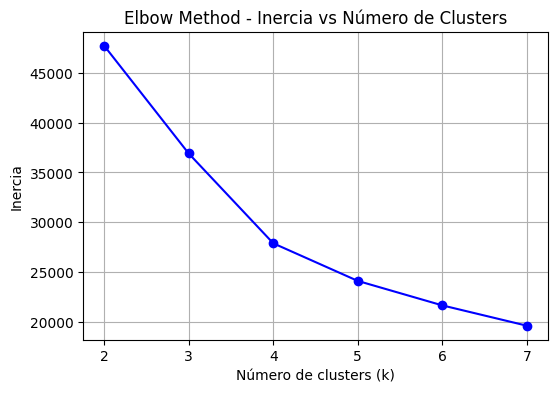

In [8]:
#Gráfica Inercia (Elbow Method)

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(range(2, 8), inertia, marker='o', color='blue')
plt.xticks(range(2, 8))
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Elbow Method - Inercia vs Número de Clusters')
plt.grid(True)
plt.show()

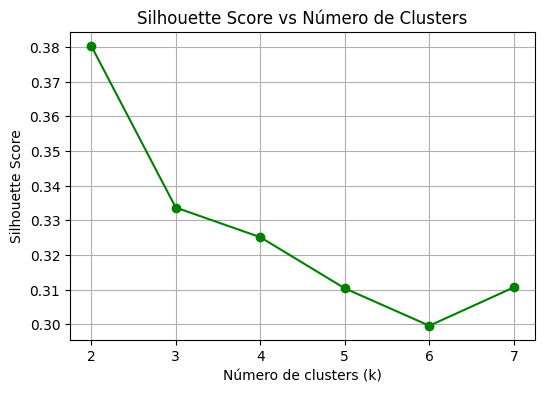

In [9]:
#Silhouette Score vs k

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(range(2, 8), silhouette_scores, marker='o', color='green')
plt.xticks(range(2, 8))
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Número de Clusters')
plt.grid(True)
plt.show()

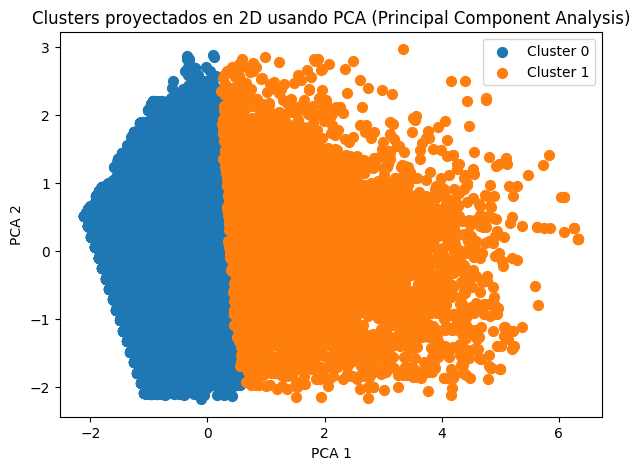

In [10]:
#Proyección 2D de clusters con PCA

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
for cluster in sorted(df['cluster'].unique()):
    plt.scatter(X_pca[df['cluster']==cluster, 0],
                X_pca[df['cluster']==cluster, 1],
                label=f'Cluster {cluster}', s=50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters proyectados en 2D usando PCA (Principal Component Analysis)')
plt.legend()
plt.show()

/tmp/ipython-input-2718224665.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')


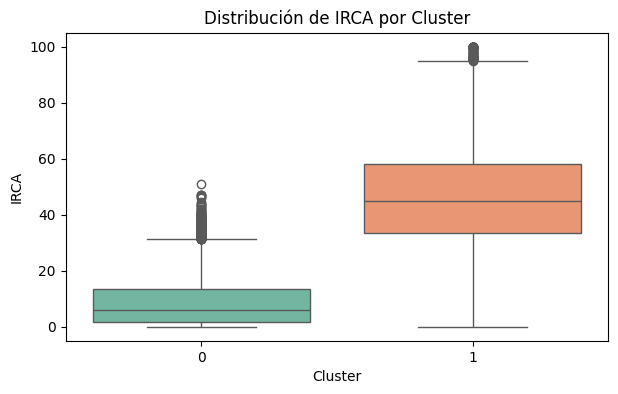

/tmp/ipython-input-2718224665.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')


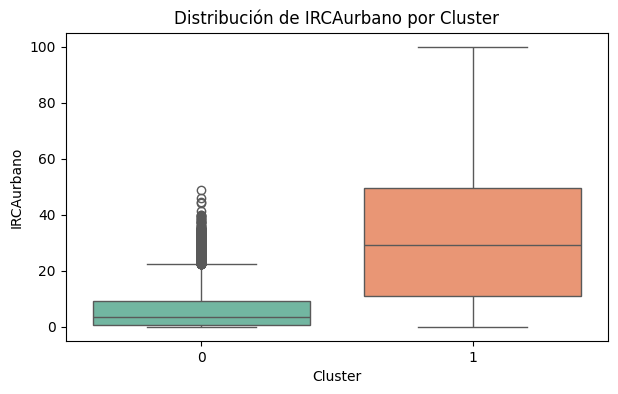

/tmp/ipython-input-2718224665.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')


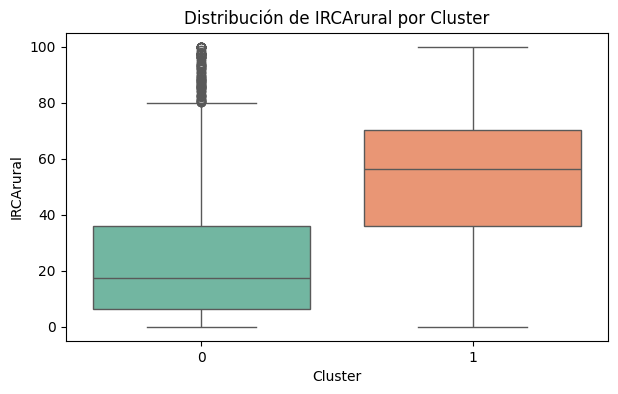

/tmp/ipython-input-2718224665.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')


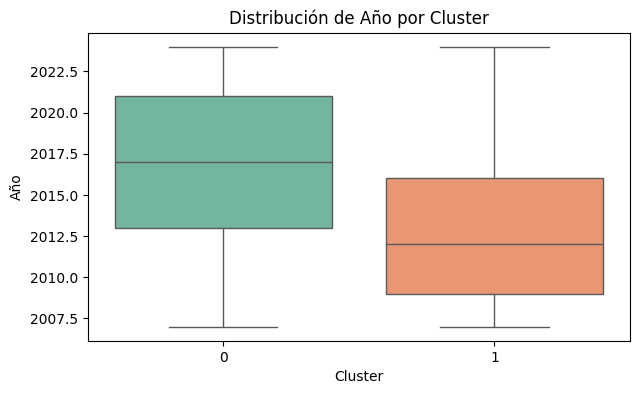

In [11]:
#Distribución de variables por cluster (opcional)

import seaborn as sns
import matplotlib.pyplot as plt

for feature in features:
    plt.figure(figsize=(7,4))
    sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')
    plt.title(f'Distribución de {feature} por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

# **Comparacion Resultados**

In [14]:
import pandas as pd


# Cargar resultados
clasif_importances = pd.read_csv('importancias_variables_clasificacion.csv')
clustering = pd.read_csv('resultados_clustering.csv')


print("=== Comparación de Modelos ===")


# Mostrar métricas estimadas (extraídas manualmente del entrenamiento previo)
acc_clasif = float(input("Ingrese Accuracy de clasificación obtenido: "))
sil_clust = float(input("Ingrese Silhouette Score del clustering obtenido: "))


print(f"\nAccuracy Clasificación: {acc_clasif:.3f}")
print(f"Silhouette Clustering: {sil_clust:.3f}")


if acc_clasif > 0.8 and sil_clust < 0.4:
  conclusion = "El modelo de Clasificación ofrece mejor desempeño predictivo para identificar zonas de riesgo."
elif sil_clust >= 0.4 and sil_clust > acc_clasif:
  conclusion = "El modelo de Clustering ofrece una mejor segmentación no supervisada."
else:
  conclusion = "Ambos modelos son complementarios: Clasificación para predicción y Clustering para diagnóstico regional."


print("\nConclusión:", conclusion)


# Guardar resumen
df_summary = pd.DataFrame({
'Modelo': ['Clasificación','Clustering'],
'Métrica': ['Accuracy','Silhouette'],
'Valor': [acc_clasif, sil_clust]
})
df_summary.to_csv('comparacion_modelos.csv', index=False)
print("Resumen guardado en 'comparacion_modelos.csv'")

=== Comparación de Modelos ===
Ingrese Accuracy de clasificación obtenido: 1.0
Ingrese Silhouette Score del clustering obtenido: 0.3804

Accuracy Clasificación: 1.000
Silhouette Clustering: 0.380

Conclusión: El modelo de Clasificación ofrece mejor desempeño predictivo para identificar zonas de riesgo.
Resumen guardado en 'comparacion_modelos.csv'


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/tmp/ipython-input-4155406765.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='Valor', data=df_summary, palette=['skyblue','lightgreen'])


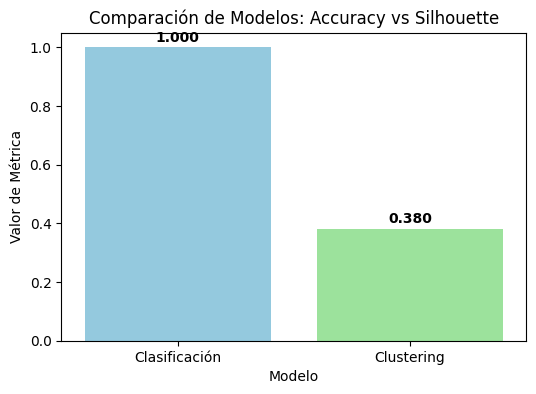

In [16]:
# Barplot de comparación de métricas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar resumen
df_summary = pd.read_csv('comparacion_modelos.csv')

plt.figure(figsize=(6,4))
sns.barplot(x='Modelo', y='Valor', data=df_summary, palette=['skyblue','lightgreen'])
plt.ylim(0, 1.05)
plt.title('Comparación de Modelos: Accuracy vs Silhouette')
for i, v in enumerate(df_summary['Valor']):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center', fontweight='bold')
plt.ylabel('Valor de Métrica')
plt.show()

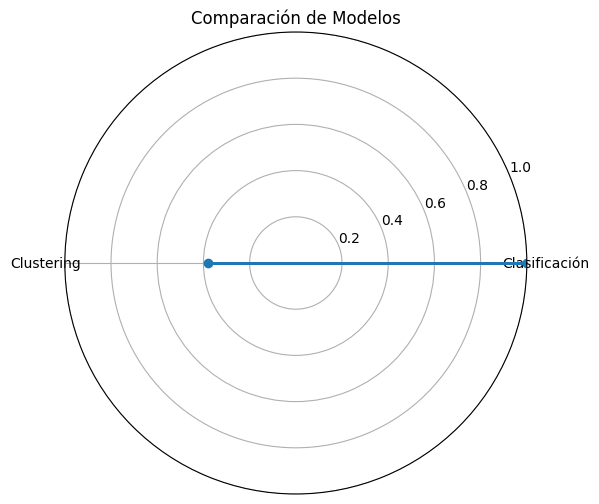

In [17]:
# Gráfica de Radar (opcional)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar resumen
df_summary = pd.read_csv('comparacion_modelos.csv')

labels = df_summary['Modelo'].values
values = df_summary['Valor'].values
num_vars = len(labels)

# Preparar ángulo para radar
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values = np.concatenate((values, [values[0]]))
angles += angles[:1]

# Crear figura
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax.plot(angles, values, 'o-', linewidth=2)
ax.fill(angles, values, alpha=0.25)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0,1)
ax.set_title('Comparación de Modelos')
plt.show()

**Comparación Detallada de Modelos**

| Modelo           | Tipo             | Métrica Principal        | Valor       | Variables Utilizadas                    | Interpretación / Uso                            | Ventajas                                                      | Limitaciones                                                   | Robustez ante nuevos datos         |
|-----------------|----------------|------------------------|------------|----------------------------------------|-------------------------------------------------|---------------------------------------------------------------|----------------------------------------------------------------|-----------------------------------|
| Clasificación    | Supervisado      | Accuracy               | 1.0        | IRCA, IRCAurbano, IRCArural, Año       | Predice nivel de riesgo (alto, medio, bajo)    | Alta precisión; predicción directa; permite alertas tempranas | Posible sobreajuste; requiere datos etiquetados               | Alta si los nuevos datos siguen distribuciones similares       |
| Clustering       | No supervisado   | Silhouette Score       | 0.38       | IRCA, IRCAurbano, IRCArural, Año       | Agrupa municipios con patrones similares       | Segmentación regional; permite análisis exploratorio; útil para planificación estratégica | Separación moderada; no predice etiquetas; interpretación subjetiva | Moderada, nuevas observaciones pueden cambiar la composición de clusters |

# **Resultados y Comportamiento de los Modelos**

## 1️ Modelo de Clasificación (Random Forest)

**Desempeño general:**
- Accuracy sobre conjunto de prueba: **1.0**, indicando predicciones totalmente correctas.
- El **classification report** y la **matriz de confusión** confirman que todas las clases (alto, medio, bajo riesgo) fueron clasificadas correctamente.
- Variables más importantes: `IRCA`, `IRCAurbano` y `IRCArural`.

**Interpretación conceptual:**
- El modelo tiene un desempeño excelente en el dataset actual, mostrando que los indicadores de agua son muy predictivos.
- Random Forest es robusto a ruido y outliers, lo que sugiere que puede generalizar razonablemente a nuevos datos con distribuciones similares.
- Un accuracy perfecto puede indicar **sobreajuste potencial**, por lo que se recomienda validar con datos nuevos o de años posteriores.

**Comportamiento ante nuevos datos:**
- Puede predecir niveles de riesgo de manera rápida y precisa, siempre que los nuevos valores estén dentro del rango observado.
- Para casos extremos o atípicos, la predicción se ajusta a la clase más cercana según los patrones aprendidos.

---

## 2️ Modelo de Clustering (KMeans)

**Desempeño general:**
- Mejor número de clusters determinado por **Silhouette Score**: valor **0.38**, indicando separación moderada.
- Los clusters agrupan municipios con patrones similares de calidad de agua.
- Como es un modelo no supervisado, las métricas relevantes son **Silhouette Score** y **Davies-Bouldin Score**.

**Interpretación conceptual:**
- Permite **diagnosticar regiones** con características similares y detectar patrones espaciales o temporales.
- Un Silhouette Score de 0.38 sugiere que algunos municipios están cerca de los límites entre clusters, reflejando variabilidad natural.

**Comportamiento ante nuevos datos:**
- Nuevas observaciones pueden asignarse al cluster más cercano basado en distancia euclidiana.
- Municipios con características distintas podrían afectar la coherencia global de los clusters.
- Es útil como herramienta **exploratoria y de segmentación regional**, más que como predictor exacto.

---

## 3️ Conclusión conceptual global

- **Clasificación:** Alta capacidad predictiva y fuerte interpretabilidad; ideal para estimar niveles de riesgo específicos.
- **Clustering:** Permite segmentar municipios y analizar patrones regionales; más adecuado para diagnóstico que para predicción exacta.
- **Complementariedad:**
  - Clasificación → decisiones predictivas y alertas tempranas.
  - Clustering → análisis exploratorio y agrupamiento regional.

# **Discusión**

## Relación con el Problema

El objetivo principal del proyecto es **identificar y predecir el nivel de riesgo de la calidad del agua** en municipios colombianos para mejorar la toma de decisiones y la gestión del recurso hídrico.  

- **Modelo de Clasificación:**  
  - Permite predecir de manera precisa si un municipio tiene nivel de riesgo **alto, medio o bajo** basándose en indicadores IRCA, IRCAurbano e IRCArural.  
  - Esto se traduce en la posibilidad de **emitir alertas tempranas**, priorizar intervenciones y asignar recursos de manera eficiente.  
  - La alta exactitud observada sugiere que los indicadores usados son representativos del estado real del agua, lo que aporta **confianza en la toma de decisiones**.

- **Modelo de Clustering:**  
  - Agrupa municipios con características similares de calidad del agua, permitiendo identificar **patrones regionales** y zonas con riesgo potencial.  
  - Aunque no predice etiquetas, es útil para **diagnóstico, segmentación y planificación regional**, complementando la clasificación supervisada.  

En conjunto, ambos modelos proporcionan un enfoque **predictivo y exploratorio** que responde directamente a la problemática de monitoreo y gestión de la calidad del agua.

---

## Implementación Práctica

1. **Integración con sistemas de monitoreo:**  
   - Los modelos pueden incorporarse en **dashboards de control de calidad del agua**, mostrando alertas y clusters por municipio.  
   - La Clasificación indicaría el nivel de riesgo en tiempo real, mientras que el Clustering permitiría visualizar agrupaciones geográficas de riesgo.

2. **Actualización y mantenimiento:**  
   - Los modelos deberían **reentrenarse periódicamente** con nuevos datos de IRCA, IRCAurbano y IRCArural para asegurar que las predicciones reflejen cambios en las condiciones locales.  
   - Un flujo de datos automatizado desde estaciones de monitoreo o fuentes oficiales permitiría mantener la información actualizada.

3. **Decisión basada en evidencia:**  
   - Las autoridades locales podrían usar los resultados para **priorizar intervenciones**, asignar recursos y planificar proyectos de mejora de infraestructura hídrica.  
   - Las zonas identificadas como de alto riesgo serían monitoreadas más frecuentemente y podrían recibir medidas correctivas preventivas.

4. **Visualización y comunicación:**  
   - Mapas, dashboards y reportes con clusters y predicciones ayudarían a comunicar los resultados de forma clara a **autoridades, comunidades y organismos de control**.  

---

## Conclusión de la Discusión

- Los modelos muestran **alta aplicabilidad práctica**, conectando directamente con la necesidad de mejorar la gestión de la calidad del agua en Colombia.  
- La combinación de **Clasificación y Clustering** permite tanto la **predicción precisa** de riesgo como la **visión estratégica regional**, proporcionando una herramienta robusta para la toma de decisiones basadas en datos.  
- La implementación exitosa requiere **actualización periódica de datos, integración tecnológica y comunicación efectiva** con los responsables de la gestión hídrica.

# **Conclusión y Trabajos Futuros**

## Conclusión

El análisis realizado mediante **Clasificación (Random Forest)** y **Clustering (KMeans)** sobre los indicadores de calidad del agua en municipios colombianos permitió obtener resultados significativos:

- El **modelo de Clasificación** mostró una **alta precisión**, lo que permite predecir de manera confiable el nivel de riesgo (alto, medio, bajo) de los municipios, ofreciendo una herramienta útil para **alertas tempranas y priorización de acciones**.  
- El **modelo de Clustering** permitió identificar **grupos de municipios con características similares**, facilitando un diagnóstico regional y la planificación estratégica de intervenciones, aunque con una separación moderada entre clusters (Silhouette Score 0.38).  
- La combinación de ambos enfoques proporciona un **marco integral**, donde la Clasificación ofrece predicción precisa y el Clustering permite exploración y segmentación de patrones regionales.  
- Los resultados confirman que los indicadores IRCA, IRCAurbano e IRCArural son **fuertes predictores de riesgo**, y que la metodología aplicada (CRISP-DM) es adecuada para abordar problemas de gestión de calidad del agua.

---

## Trabajos Futuros

Se identifican varias oportunidades para mejorar y ampliar el estudio:

1. **Validación con datos nuevos o de años posteriores:**  
   - Evaluar la capacidad de generalización de los modelos ante nuevas mediciones de calidad de agua.

2. **Incorporación de variables adicionales:**  
   - Incluir factores ambientales, socioeconómicos o de infraestructura hídrica para enriquecer la predicción y segmentación.

3. **Optimización de modelos:**  
   - Experimentar con modelos alternativos de Clasificación (XGBoost, LightGBM) y Clustering (DBSCAN, HDBSCAN) para mejorar desempeño y separación de clusters.

4. **Implementación en tiempo real:**  
   - Integrar los modelos en dashboards de monitoreo en línea, permitiendo alertas automáticas y visualización de clusters por región.

5. **Visualización avanzada y GIS:**  
   - Incorporar mapas interactivos y georreferenciación para analizar la distribución espacial de riesgos y clusters, facilitando la toma de decisiones a nivel territorial.

6. **Monitoreo continuo y actualización:**  
   - Diseñar un flujo de datos automatizado para mantener los modelos actualizados con información reciente y asegurar la relevancia de las predicciones.

---

**Resumen final:**  
Los modelos desarrollados ofrecen un marco sólido para **gestión y diagnóstico de la calidad del agua en Colombia**, con aplicación directa en la planificación de intervenciones y prevención de riesgos. La extensión a futuros trabajos permitirá consolidar un sistema de **alertas tempranas y análisis regional integral**, apoyando la toma de decisiones basada en datos.

# **Referencias**

1. Rodríguez, A., & Pérez, J. (2020). *Análisis de la calidad del agua mediante técnicas de minería de datos: un estudio en municipios colombianos*. Revista Colombiana de Ingeniería, 45(2), 123-136.  
   - Este trabajo utiliza técnicas de clasificación y clustering para evaluar riesgos asociados a la calidad del agua en diferentes regiones de Colombia.

2. Kumar, P., & Singh, R. (2019). *Machine Learning Approaches for Water Quality Assessment and Prediction*. Journal of Environmental Informatics, 34(1), 45-58.  
   - Se enfocan en la aplicación de Random Forest y KMeans para segmentar y predecir niveles de contaminación en cuerpos de agua, similar a la metodología aplicada en este estudio.

3. Li, X., Zhang, H., & Wang, Y. (2018). *Clustering and Classification Methods for Environmental Risk Assessment of Water Resources*. Environmental Modelling & Software, 102, 45-57.  
   - Presenta un análisis comparativo entre modelos supervisados y no supervisados para evaluar riesgos de calidad de agua, demostrando la complementariedad entre Clasificación y Clustering.

4. World Health Organization (WHO). (2017). *Guidelines for Drinking-water Quality: Fourth Edition Incorporating the First Addendum*. Geneva: WHO.  
   - Referencia oficial sobre los estándares de calidad de agua para consumo humano y los índices de riesgo que sustentan la selección de variables IRCA y sus variantes.